# Introduction


**What?** How to make distribution more Gaussian applied to a dataset



# Import modules

In [2]:
from numpy import mean, std
from pandas import read_csv
from numpy import exp
from pandas import DataFrame
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# What  is a power transform?


- A power transform will make the probability distribution of a variable more Gaussian. 
- This is often described as removing a skew in the distribution, although more generally is described as **stabilizing the variance** of the distribution. 



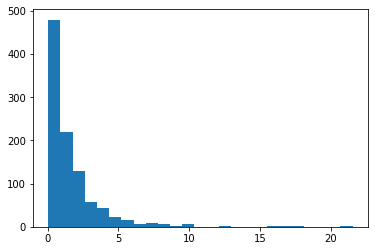

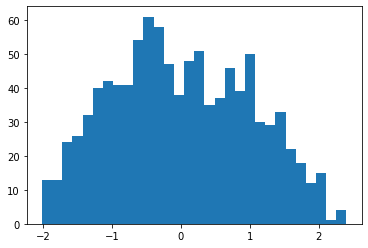

In [5]:
# generate skewed Faussian data sample
data = randn(1000)
data = exp(data)
pyplot.hist(data, bins=25)
pyplot.show()


data = data.reshape((len(data),1))
power = PowerTransformer(method = 'yeo-johnson', standardize = True) 
data_trans = power.fit_transform(data)
pyplot.hist(data_trans, bins = 30)
pyplot.show()                                    

# Import dataset

In [9]:
dataset = read_csv('../DATASETS/sonar.csv', header=None)
print(dataset.shape)

(208, 61)


In [10]:
print(dataset.describe())

               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.1

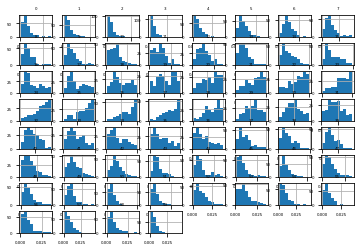

In [11]:
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()


- From the histograms we can see that many variables have a skewed distribution. 
- **Can we make the dataset more Gaussian?** 



# Data cleaning

In [12]:
data = dataset.values
X, y = data[:, :-1], data[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# Model with no transformation

In [14]:
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (std=%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (std=0.073)


# Box-Cox Transform


- It is a power transform that assumes the values are **strictly positive**.
- One way to make the data >0 is to use a `MixMaxScaler` transform.
- The shape of the histograms for each variable looks more Gaussian than the raw data.



In [16]:
# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range = (1, 2))
power = PowerTransformer(method = 'box-cox')
pipeline = Pipeline(steps = [('s', scaler),('p', power)]) 
data = pipeline.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

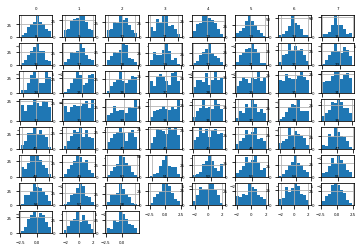

In [17]:
fig = dataset.hist(xlabelsize = 4, ylabelsize = 4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

# Model on the Box-Cox transformed dataset


- We can see that there is a clear lift in performance.



In [19]:
dataset = read_csv('../DATASETS/sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [20]:
# Scale and feed into a pipeline
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])

In [21]:
# Evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.085)


# Yeo-Johnson Transform


- Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive. 
- It supports zero values and negative values. 
- This means we can apply it to our dataset without scaling it first



In [22]:
dataset = read_csv('../DATASETS/sonar.csv', header=None)
# Retrieve just the numeric input values
data = dataset.values[:, :-1]

# Perform a yeo-johnson transform of the dataset 
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)

dataset = DataFrame(data)

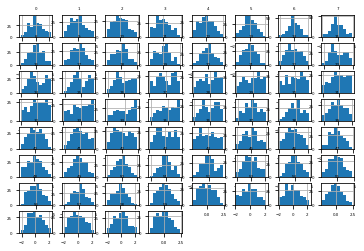

In [24]:
fig = dataset.hist(xlabelsize = 4, ylabelsize = 4) 
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

# Model on the Yeo-Johnson transformed datase

In [27]:
dataset = read_csv('../DATASETS/sonar.csv', header=None)
data = dataset.values

# Separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# Define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])

# Evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)


# Yeo-Johnson Transform on the sonar dataset PLUS standardisation


- Sometimes a lift in performance can be achieved by first standardizing the raw dataset prior to performing a Yeo-Johnson transform. 
- Let's add a `StandardScaler` as a first step in the pipeline.
- Standardizing the data prior to the Yeo-Johnson transform resulted in a small lift in performance.



In [27]:
dataset = read_csv('../DATASETS/sonar.all-data.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
scaler = StandardScaler() #  <<<---
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.077)


# References


- https://machinelearningmastery.com/power-transforms-with-scikit-learn/

